In [40]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [42]:
# scaler = StandardScaler()
# df[['height_cm', 'weight_kg']] = scaler.fit_transform(df[['height_cm', 'weight_kg']])
# scaler = MinMaxScaler()
# df[['height_cm', 'weight_kg']] = scaler.fit_transform(df[['height_cm', 'weight_kg']])

In [65]:
df_old = pd.read_csv('./data/renttherunway_final_data.csv')

In [66]:
df_old['body type'].isna().sum()

14637

In [41]:
df = pd.read_csv('./data/renttherunway_balanced_data.csv')

In [6]:
d

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,height_cm,weight_kg
0,fit,973869,34b,904766,138lbs,10.0,wedding,This dress fit true to size. I received compli...,straight & narrow,Gorgeous in Green,sheath,"5' 10""",8,30.0,"September 19, 2016",177.80,62.595696
1,large,703862,36b,1366699,NaN,2.0,wedding,"Even though I used the sizing chart, I wasn't ...",hourglass,Runs a little large,sheath,"5' 6""",45,30.0,"May 31, 2014",167.64,62.319780
2,small,96023,32b,640121,125lbs,10.0,party,Great style for maternity. Unique dress which ...,hourglass,Loved this dress! Photographs so well.,dress,"5' 5""",8,38.0,"August 29, 2017",165.10,56.699000
3,small,586056,NaN,1869056,NaN,8.0,everyday,This is a really pretty dress but I didn't rea...,hourglass,Looked different in person,dress,"5' 9""",12,37.0,"August 9, 2016",175.26,62.319780
4,small,882650,34c,1523096,126lbs,10.0,wedding,I picked this dress a few months before the we...,straight & narrow,Beautiful dress!!,dress,"5' 3""",16,36.0,"March 20, 2017",160.02,57.152592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74116,fit,227617,36dd,2589683,150lbs,8.0,everyday,Loved the color. Fabric substantial and hangs ...,hourglass,Beautiful color,top,"5' 8""",20,36.0,"October 26, 2017",172.72,68.038800
74117,small,364913,36c,1832871,149lbs,8.0,wedding,Based on the other reviews I ordered an 8 (thi...,athletic,Loved the color and shape,sheath,"5' 4""",16,27.0,"January 6, 2015",162.56,67.585208
74118,large,587983,36ddd/e,132738,200lbs,10.0,wedding,"It fit perfect. I have a large bust(38 DDD), s...",hourglass,I rented this dress for my 2nd dress after our...,gown,"5' 4""",16,35.0,"April 11, 2013",162.56,90.718400
74119,small,94885,34c,1076484,155lbs,8.0,wedding,I really liked the look of the dress and got a...,athletic,Beautiful and special!,dress,"5' 5""",20,31.0,"October 12, 2014",165.10,70.306760


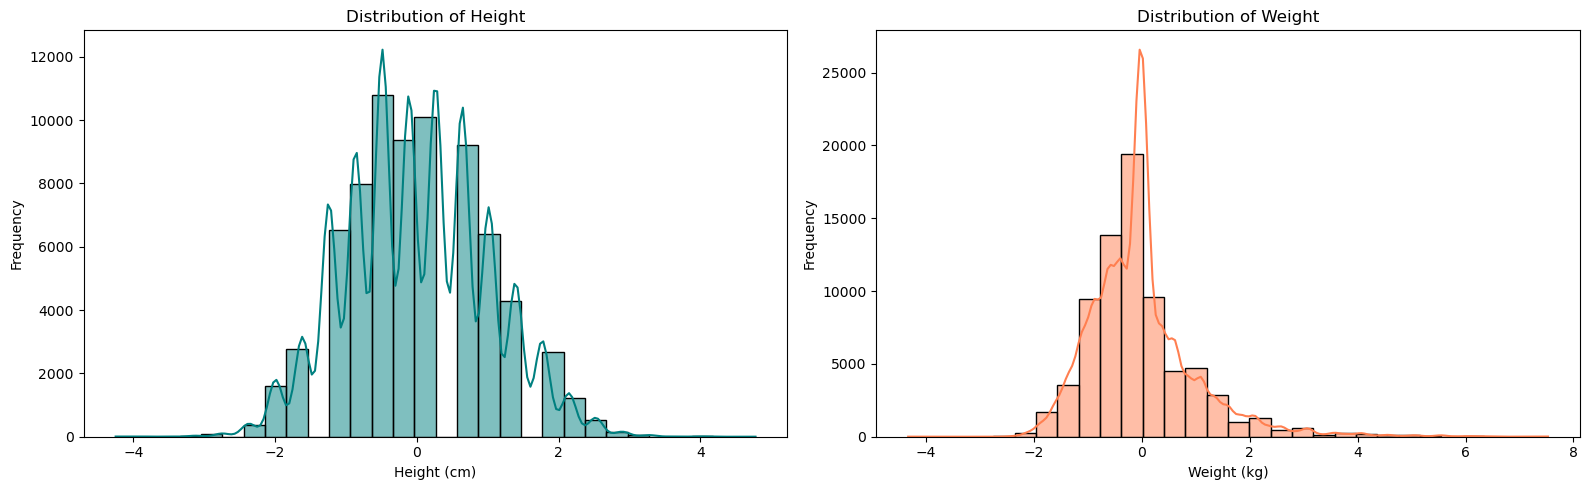

In [43]:
def plot_height_weight_distributions(data):
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Height Distribution
    sns.histplot(data['height_cm'], kde=True, bins=30, ax=axes[0], color='teal')
    axes[0].set_xlabel('Height (cm)')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Distribution of Height')
    
    # Weight Distribution
    sns.histplot(data['weight_kg'], kde=True, bins=30, ax=axes[1], color='coral')
    axes[1].set_xlabel('Weight (kg)')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('Distribution of Weight')
    
    plt.savefig('Distribution of Height & Weight.png')
    plt.tight_layout()
    plt.show()
    
plot_height_weight_distributions(df)

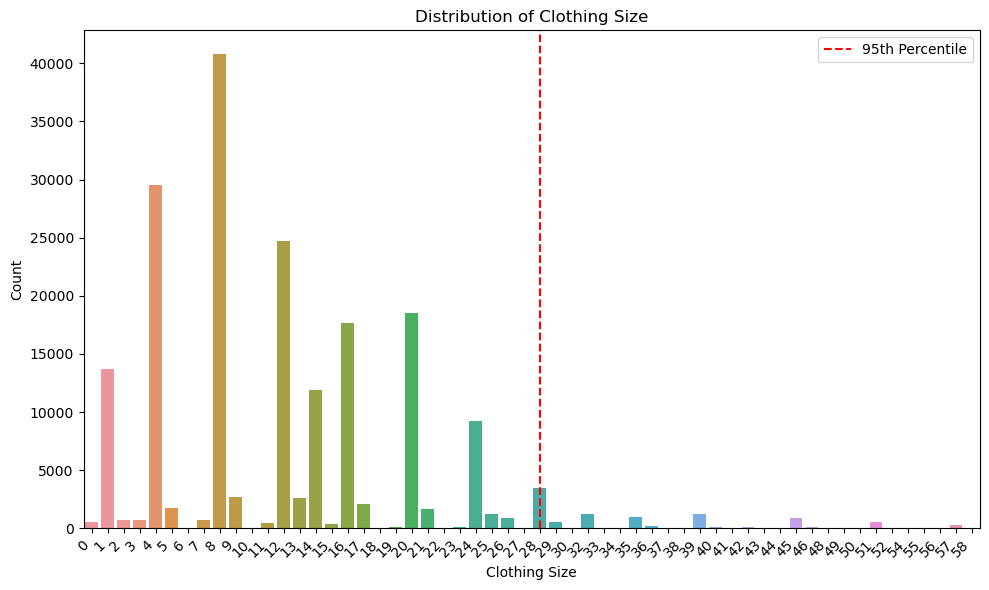

In [70]:
def plot_size_distribution(data):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='size', data=data, order=sorted(data['size'].unique()))
    plt.xlabel('Clothing Size')
    plt.ylabel('Count')
    plt.title('Distribution of Clothing Size')
    
    # Calculate left 95% of the data
    upper_bound = np.percentile(data['size'], 95)
    plt.axvline(x=upper_bound, color='red', linestyle='--', label='95th Percentile')
    
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.legend()
    plt.tight_layout()
    plt.show()
    
plot_size_distribution(df_old)

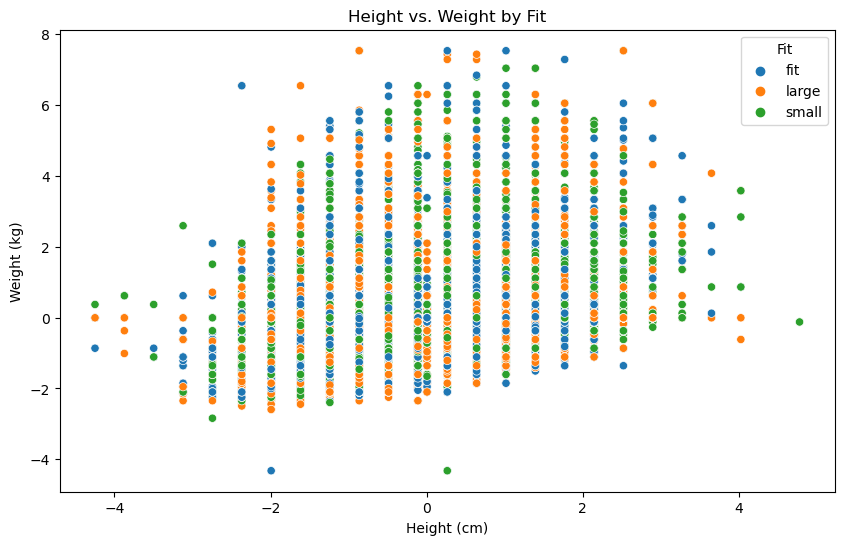

In [44]:
# Height vs. Weight by Fit
def plot_height_vs_weight_by_fit(data):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='height_cm', y='weight_kg', hue='fit', data=data)
    plt.xlabel('Height (cm)')
    plt.ylabel('Weight (kg)')
    plt.title('Height vs. Weight by Fit')
    plt.legend(title='Fit')
    plt.savefig('height_vs_weight_by_fit.png')
    plt.show()

plot_height_vs_weight_by_fit(df)


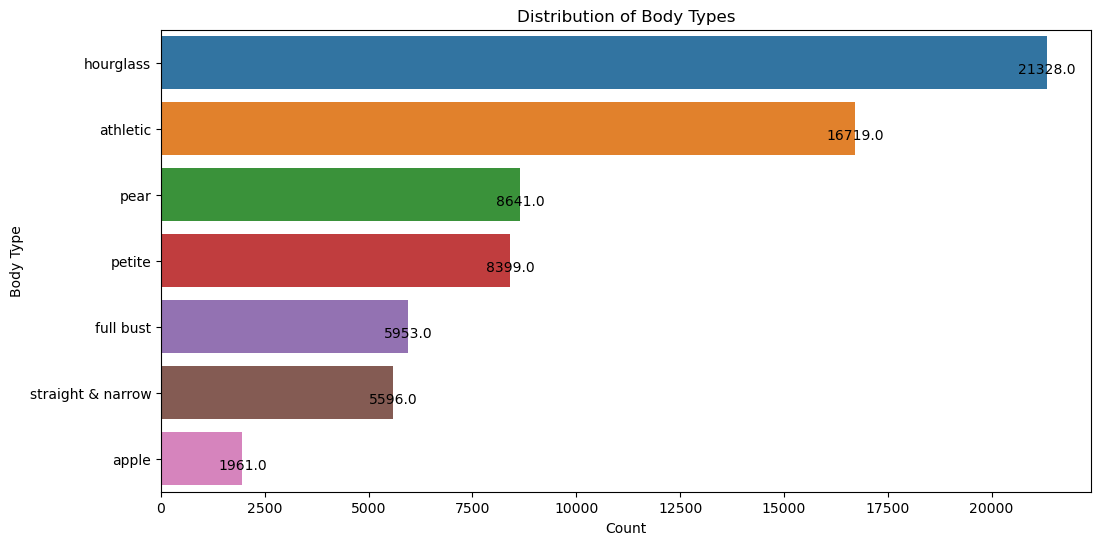

In [33]:
def plot_body_type_distribution(data):
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(y='body type', data=data, order=data['body type'].value_counts().index)
    for p in ax.patches:
        ax.annotate(f'{p.get_width()}', (p.get_width() + 5, p.get_y() + 0.5), ha='center', va='center')
    plt.xlabel('Count')
    plt.ylabel('Body Type')
    plt.title('Distribution of Body Types')
    plt.show()
plot_body_type_distribution(df)

In [46]:
df_old = pd.read_csv('./data/renttherunway_final_data.csv')

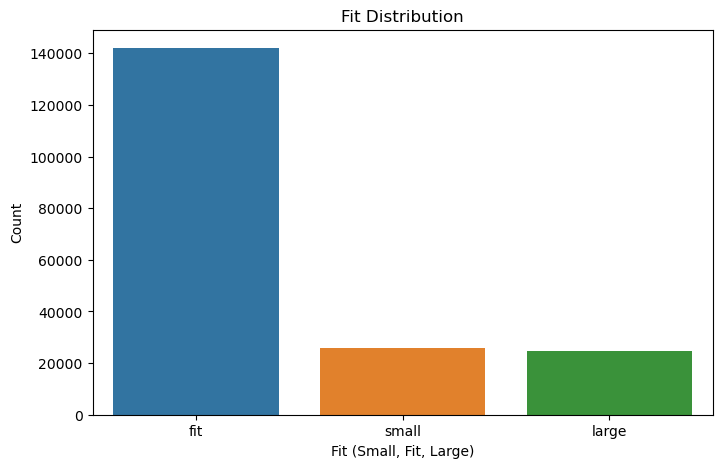

In [47]:
# Fit Distribution
def plot_fit_distribution(data):
    plt.figure(figsize=(8, 5))
    sns.countplot(x='fit', data=data)
    plt.xlabel('Fit (Small, Fit, Large)')
    plt.ylabel('Count')
    plt.title('Fit Distribution')
    plt.savefig('distribution_fit.png')
    plt.show()
plot_fit_distribution(df_old)

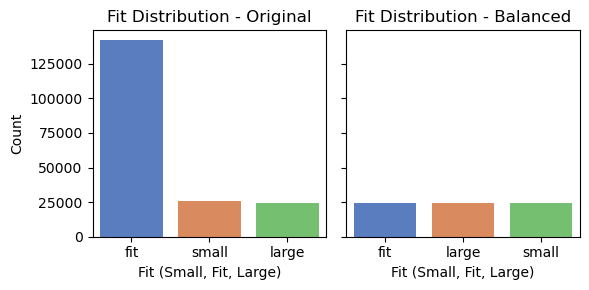

In [64]:
def plot_side_by_side_fit_distribution(data_old, data_new):
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(6, 3), sharey=True)
    
    # Plot the old data
    sns.countplot(ax=axes[0], x='fit', data=data_old, palette='muted')
    axes[0].set_title('Fit Distribution - Original')
    axes[0].set_xlabel('Fit (Small, Fit, Large)')
    axes[0].set_ylabel('Count')

    # Plot the new data
    sns.countplot(ax=axes[1], x='fit', data=data_new, palette='muted')
    axes[1].set_title('Fit Distribution - Balanced')
    axes[1].set_xlabel('Fit (Small, Fit, Large)')
    axes[1].set_ylabel('')  # Share y-axis label, so leave this blank

    # Adjust layout and save the figure
    plt.tight_layout()
    plt.savefig('side_by_side_fit_distribution.png')
    plt.show()

# Call the function
plot_side_by_side_fit_distribution(df_old, df)

In [64]:
rent_data_cleaned["fit"].value_counts()

fit
fit      136481
small     24580
large     23768
Name: count, dtype: int64